In [0]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def data_plot_PCA(X, y, title, label):
    fig=plt.figure()
    # fig.colorbar()
    ax=fig.add_axes([0,0,1,1])
    x = ax.scatter(X[:, 0], X[:, 1], c=label[:])
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title(title)
    plt.colorbar(x)
    plt.show()

In [0]:
def data_plot(X, y, title):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(X[:50, 0], X[:50, 1], color='r',alpha=0.6, label=y[0])
    ax.scatter(X[50:100, 0], X[50:100, 1], color='b',alpha=0.5, label=y[1])
    ax.scatter(X[100:150, 0], X[100:150, 1], color='g',alpha=0.6, label=y[2])
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title(title)
    ax.legend()
    plt.show()

In [0]:
def plot_LDA(X, targets, lda):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(X[:50, 0], np.zeros((50, 1)),color='r',alpha=0.4, label=targets[0])
    ax.scatter(X[50:100, 0], np.zeros((50, 1)), color='b',alpha=0.4, label=targets[1])
    ax.set_title(targets[0] + ' and ' + targets[1])
    ax.set_ylim(-3, 3)
    x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
    b, w1, w2 = lda.intercept_[0], lda.coef_[0, 0], lda.coef_[0, 1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c='g')
    ax.legend()
    plt.show()

In [0]:
dataset = load_iris()

In [0]:
X = dataset.data
y = dataset.target

In [0]:
pca = PCA(n_components=2)
#  scaling to be done
X_pca = pca.fit_transform(X)

In [52]:
X_pca.shape

(150, 2)

In [53]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

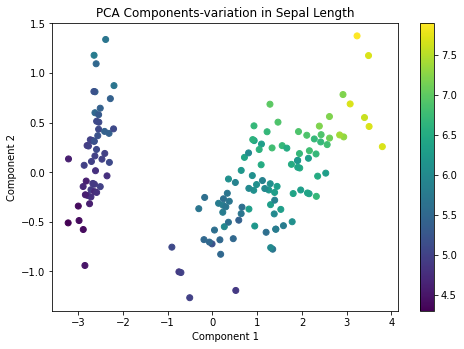

In [54]:
data_plot_PCA(X_pca, dataset.target_names, 'PCA Components-variation in Sepal Length', X[:, 0])

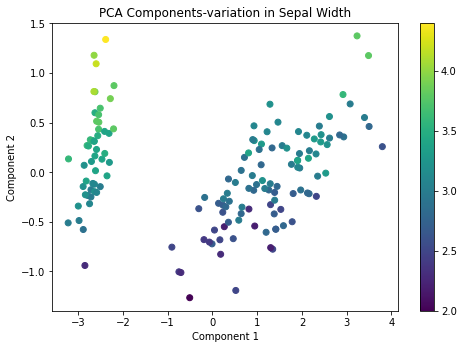

In [55]:
data_plot_PCA(X_pca, dataset.target_names, 'PCA Components-variation in Sepal Width', X[:, 1])

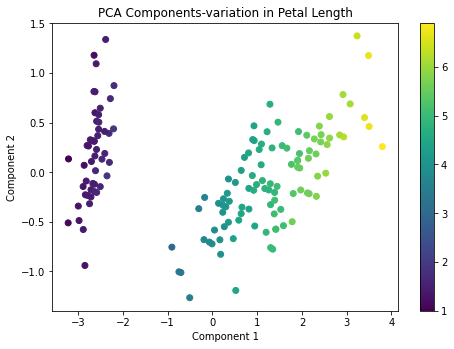

In [56]:
data_plot_PCA(X_pca, dataset.target_names, 'PCA Components-variation in Petal Length', X[:, 2])

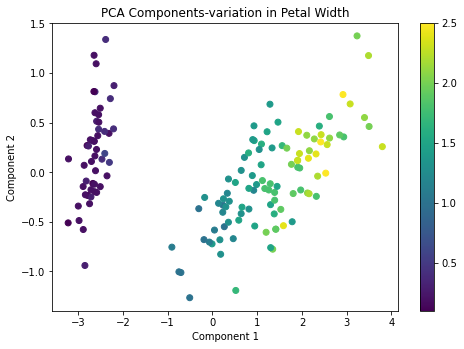

In [57]:
data_plot_PCA(X_pca, dataset.target_names, 'PCA Components-variation in Petal Width', X[:, 3])

In [0]:
import seaborn as sns

In [59]:
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris['species'] = dataset.target
iris['species']=iris['species'].apply(lambda x: dataset['target_names'][x])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


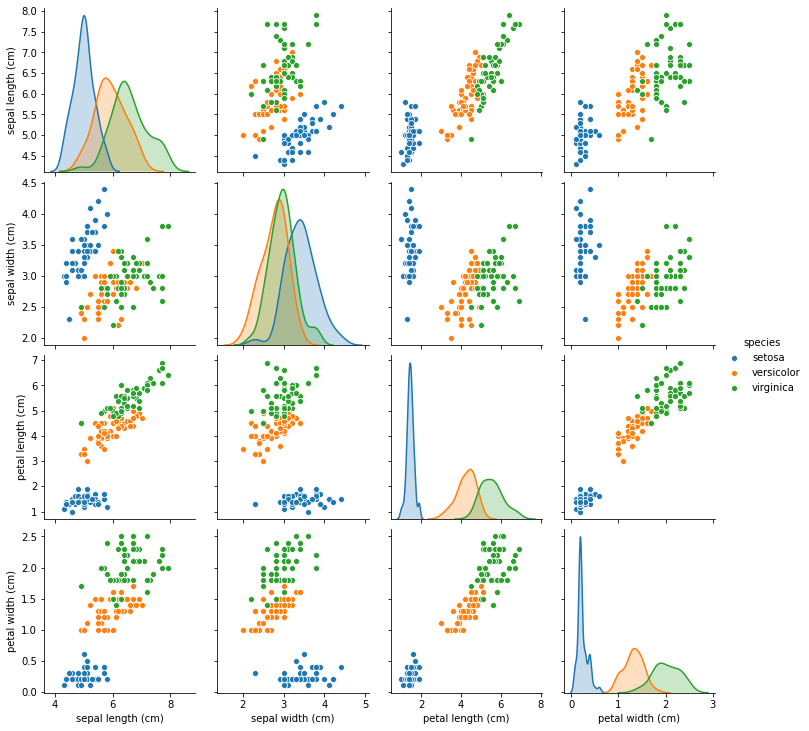

In [60]:
sns.pairplot(iris, hue='species')

In [0]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

In [79]:
X_lda.shape

(150, 2)

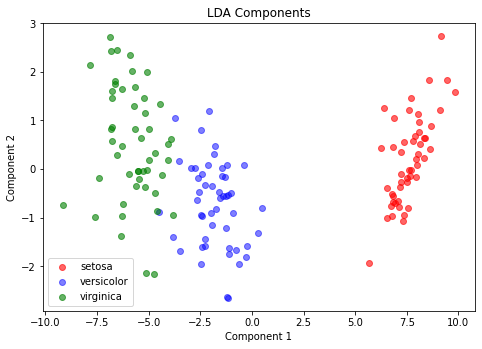

In [80]:
data_plot(X_lda, dataset.target_names, 'LDA Components')

In [0]:
setosa = X[0:50, :]
setosa_target = y[0:50]
versicolor = X[50:100, :]
versicolor_target = y[50:100]
virginica = X[100:150, :]
virginica_target = y[100:150]

x1 = np.concatenate((setosa, versicolor), axis=0)
y1 = np.concatenate((setosa_target, versicolor_target), axis=0)

x2 = np.concatenate((versicolor, virginica), axis=0)
y2 = np.concatenate((versicolor_target, virginica_target), axis=0)

x3 = np.concatenate((setosa, virginica), axis=0)
y3 = np.concatenate((setosa_target, virginica_target), axis=0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
x2 = StandardScaler().fit_transform(x2)
x3 = StandardScaler().fit_transform(x3)
x1 = StandardScaler().fit_transform(x1)

In [0]:
lda1 = LDA(n_components=1)
lda2 = LDA(n_components=1)
lda3 = LDA(n_components=1)

x1_lda = lda1.fit_transform(x1, y1)
x2_lda = lda2.fit_transform(x2, y2)
x3_lda = lda3.fit_transform(x3, y3)

In [111]:
x1_lda.shape

(100, 1)

In [112]:
lda1.coef_

array([[-1.94913821, -8.58504141, 31.39300313, 17.3442968 ]])

In [113]:
lda1.intercept_

array([-1.42108547e-14])

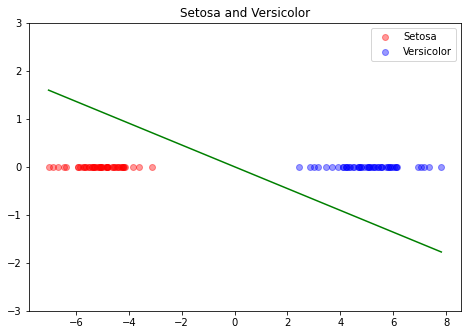

In [114]:
plot_LDA(x1_lda, ['Setosa', 'Versicolor'], lda1)

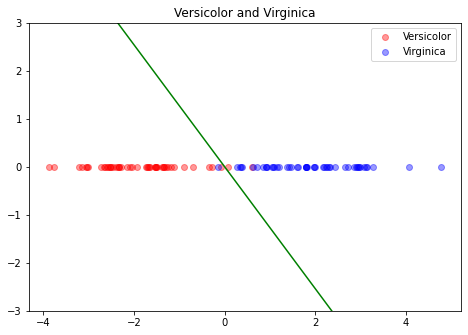

In [115]:
plot_LDA(x2_lda, ['Versicolor', 'Virginica'], lda2)

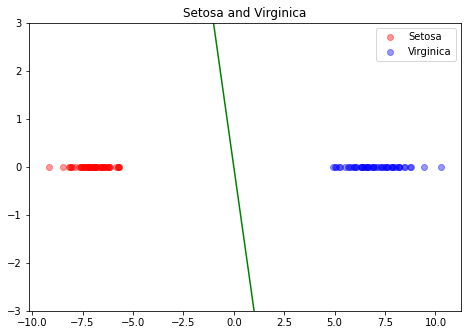

In [116]:
plot_LDA(x3_lda, ['Setosa', 'Virginica'], lda3)

In [0]:
tsne = TSNE(n_components=2, metric='euclidean')
X_tsne1 = tsne.fit_transform(X)

In [70]:
X_tsne1.shape

(150, 2)

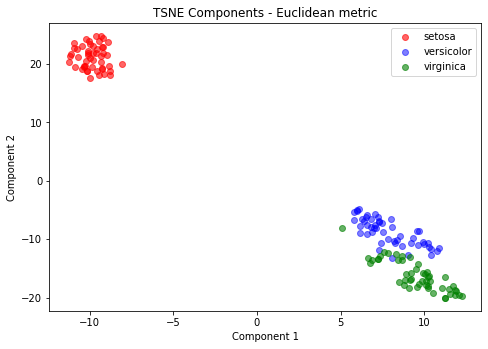

In [71]:
data_plot(X_tsne1, dataset.target_names, 'TSNE Components - Euclidean metric')

In [0]:
tsne = TSNE(n_components=2, metric='chebyshev')
X_tsne2 = tsne.fit_transform(X)

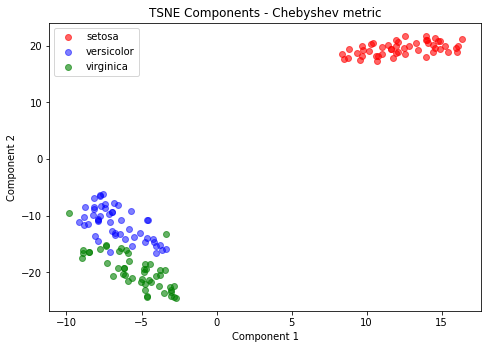

In [73]:
data_plot(X_tsne2, dataset.target_names, 'TSNE Components - Chebyshev metric')

In [0]:
tsne = TSNE(n_components=2, metric='mahalanobis')
X_tsne3 = tsne.fit_transform(X)

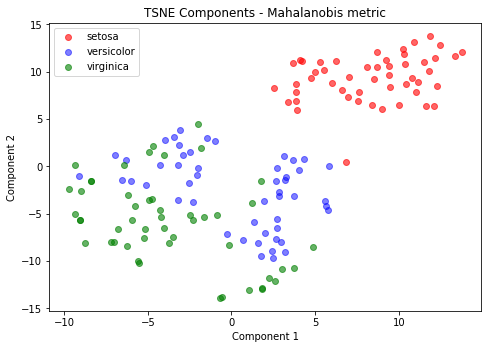

In [76]:
data_plot(X_tsne3, dataset.target_names, 'TSNE Components - Mahalanobis metric')

In [0]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3D(X, y, title):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(X[0:50, 0], X[0:50, 1], X[0:50, 2], color='r', label=y[0])
    ax.scatter(X[50:100, 0], X[50:100, 1], X[50:100, 2], color='b', label=y[1])
    ax.scatter(X[100:150, 0], X[100:150, 1], X[100:150, 2], color='g', label=y[2])
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(title)
    ax.legend()
    plt.show()

In [0]:
tsne = TSNE(n_components=3, metric='euclidean')
X_tsne_3D_1 = tsne.fit_transform(X)

tsne = TSNE(n_components=3, metric='chebyshev')
X_tsne_3D_2 = tsne.fit_transform(X)

tsne = TSNE(n_components=3, metric='mahalanobis')
X_tsne_3D_3 = tsne.fit_transform(X)

In [39]:
X_tsne_3D_1.shape

(150, 3)

In [40]:
X_3D_1 = pd.DataFrame(X_tsne_3D_1, columns=['Component 1', 'Component 2', 'Component 3'])
X_3D_1['species'] = dataset.target
X_3D_1['species']=X_3D_1['species'].apply(lambda x: dataset['target_names'][x])
X_3D_1.head()

X_3D_2 = pd.DataFrame(X_tsne_3D_2, columns=['Component 1', 'Component 2', 'Component 3'])
X_3D_2['species'] = dataset.target
X_3D_2['species']=X_3D_2['species'].apply(lambda x: dataset['target_names'][x])
X_3D_2.head()

X_3D_3 = pd.DataFrame(X_tsne_3D_3, columns=['Component 1', 'Component 2', 'Component 3'])
X_3D_3['species'] = dataset.target
X_3D_3['species']=X_3D_3['species'].apply(lambda x: dataset['target_names'][x])
X_3D_3.head()

,Component 1,Component 2,Component 3,species
0,-75.298409,-59.115108,-36.923901,setosa
1,24.487522,-37.173664,-84.411362,setosa
2,-18.730907,43.184380,-85.154793,setosa
3,-27.960690,32.175316,-158.877121,setosa
4,-78.852112,53.942646,-54.085155,setosa


In [41]:
import plotly.express as px
fig = px.scatter_3d(X_3D_1, x='Component 1', y='Component 2', z='Component 3', color='species')
fig.show()

In [42]:
fig = px.scatter_3d(X_3D_2, x='Component 1', y='Component 2', z='Component 3', color='species')
fig.show()

In [43]:
fig = px.scatter_3d(X_3D_3, x='Component 1', y='Component 2', z='Component 3', color='species')
fig.show()